In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Load the dataset
df = pd.read_csv('FAU_Bank_Employee_Wellbeing.csv')

# Display the first 5 rows
print("First 5 rows:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print("\nColumn names and their data types:")
print(df.info())

First 5 rows:
| Employee_ID   | JOB_ROLE          | DAILY_STRESS   | WORK_TRAVELS   | TEAM_SIZE   | DAYS_ABSENT   | WEEKLY_EXTRA_HOURS   | ACHIEVED_BIG_PROJECTS   | EXTRA_HOLIDAYS   | BMI_RANGE   | TODO_COMPLETED   | DAILY_STEPS_IN_THOUSAND   | SLEEP_HOURS   | LOST_VACATION   | SUFFICIENT_INCOME   | PERSONAL_AWARDS   | TIME_FOR_HOBBY   | AGE        | GENDER   | WORK_LIFE_BALANCE_SCORE   |
|:--------------|:------------------|:---------------|:---------------|:------------|:--------------|:---------------------|:------------------------|:-----------------|:------------|:-----------------|:--------------------------|:--------------|:----------------|:--------------------|:------------------|:-----------------|:-----------|:---------|:--------------------------|
| 13943         | Business Analyst  | 2              | 2              | 5           | 0             | 5                    | 2                       | 0                | 1           | 6                | 5                         |

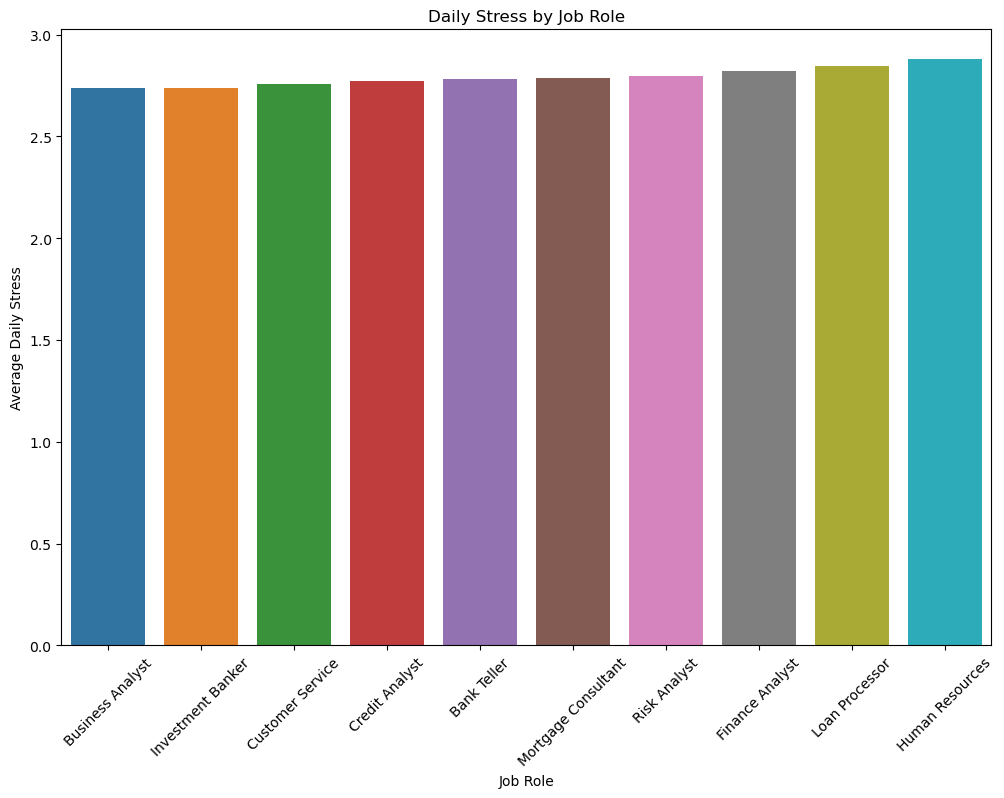

In [3]:
# Drop the row which has a null value in `DAILY_STRESS`
df.dropna(subset=['DAILY_STRESS'], inplace=True)

# Calculate the mean `DAILY_STRESS` by `JOB_ROLE`
avg_stress_by_job = df.groupby('JOB_ROLE')['DAILY_STRESS'].mean()

# Sort the results in ascending order
avg_stress_by_job = avg_stress_by_job.sort_values(ascending=True)

# Create a bar plot of average `DAILY_STRESS` by `JOB_ROLE`
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_stress_by_job.index, y=avg_stress_by_job.values)
plt.title('Daily Stress by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Daily Stress')
plt.xticks(rotation=45)

# Save the chart
plt.savefig('daily_stress_by_job_role.png')

# Show the plot
plt.show()

In [4]:
# Calculate average `TIME_FOR_HOBBY` by `GENDER_Male`
avg_hobby_time_by_gender = df.groupby('GENDER')['TIME_FOR_HOBBY'].mean()


# Print the average `TIME_FOR_HOBBY` by `GENDER_Male`
print("\nAverage time for hobby by gender:")
print(avg_hobby_time_by_gender.to_markdown(numalign="left", stralign="left"))


# Create a bar plot of average `TIME_FOR_HOBBY` by `GENDER_Male`
chart3 = alt.Chart(avg_hobby_time_by_gender.reset_index(), title='Average Time for Hobby by Gender').mark_bar().encode(
    x=alt.X('GENDER:N', axis=alt.Axis(title='Gender', labelAngle=-45)),
    y=alt.Y('TIME_FOR_HOBBY:Q', axis=alt.Axis(title='Average Time for Hobby')),
    tooltip=['GENDER', 'TIME_FOR_HOBBY']
).interactive()

# Show the chart
chart3.show()


Average time for hobby by gender:
| GENDER   | TIME_FOR_HOBBY   |
|:---------|:-----------------|
| Female   | 3.29063          |
| Male     | 3.38377          |


alt.Chart(...)

In [5]:
# Calculate average `DAILY_STRESS` by `GENDER`
avg_stress_by_gender = df.groupby('GENDER')['DAILY_STRESS'].mean()

# Print the average `DAILY_STRESS` by `GENDER`
print("Average daily stress by gender:")
print(avg_stress_by_gender.to_markdown(numalign="left", stralign="left"))

# Create a bar plot of average `DAILY_STRESS` by `GENDER_Male`
chart1 = alt.Chart(avg_stress_by_gender.reset_index(), title='Average Daily Stress by Gender').mark_bar().encode(
    x=alt.X('GENDER:N', axis=alt.Axis(title='Gender', labelAngle=-45)),
    y=alt.Y('DAILY_STRESS:Q', axis=alt.Axis(title='Average Daily Stress')),
    tooltip=['GENDER', 'DAILY_STRESS']
).interactive()

# Show the chart
chart1.show()

Average daily stress by gender:
| GENDER   | DAILY_STRESS   |
|:---------|:---------------|
| Female   | 2.92372        |
| Male     | 2.57877        |


alt.Chart(...)

In [6]:
# 2. Drop irrelevant columns
df.drop(columns=['Employee_ID', 'JOB_ROLE'], inplace=True)

# 3. Drop rows with missing values
df.dropna(subset=['DAILY_STRESS'], inplace=True)

# 4. Function to convert age ranges to midpoints
def convert_age_to_midpoint(age_str):
    if 'to' in age_str:
        start, end = map(int, age_str.split(' to '))
        return (start + end) // 2
    elif 'or more' in age_str:
        return int(age_str.split(' ')[0])
    elif 'Less than' in age_str:
        return 19
    else:
        return int(age_str)

# 5. Convert `AGE` to numeric
df['AGE'] = df['AGE'].astype(str).apply(convert_age_to_midpoint)

# 6. Create a dictionary mapping 'Male' to 1 and 'Female' to 0.
gender_map = {'Male': 1, 'Female': 0}

# 7. Replace the values in the `GENDER` column using the dictionary
df['GENDER'] = df['GENDER'].map(gender_map)

In [7]:
# 22. Filter the dataframe to include only numeric columns and the `WORK_LIFE_BALANCE_SCORE`
numeric_df = df.select_dtypes(include=np.number)

In [8]:
# 23. Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

In [9]:
# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix.to_markdown(numalign="left", stralign="left"))

# Create a heatmap to visualize the correlations
correlation_matrix_long = correlation_matrix.reset_index().melt(id_vars='index')
base = alt.Chart(correlation_matrix_long,title = "Correlation Matrix").encode(
    x=alt.X('index:O', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('variable:O', axis=alt.Axis(labelAngle=-45)),
    color=alt.Color('value:Q', scale=alt.Scale(scheme='blueorange',domain=[-1, 1])),
    tooltip=['index', 'variable', 'value']
)

# Add text labels to the heatmap
text = base.mark_text(baseline='middle').encode(
    text=alt.Text('value:Q', format='.2f'),
    color=alt.condition(
        alt.datum.value < 0.5,
        alt.value('black'),
        alt.value('white')
    )
)

# Combine the heatmap and text layers
heatmap_chart = base.mark_rect().encode(
) + text

# Save the chart
heatmap_chart.save('correlation_heatmap.json')

# 31. Show the chart
heatmap_chart.show()


Correlation Matrix:
|                         | DAILY_STRESS   | WORK_TRAVELS   | TEAM_SIZE   | DAYS_ABSENT   | WEEKLY_EXTRA_HOURS   | ACHIEVED_BIG_PROJECTS   | EXTRA_HOLIDAYS   | BMI_RANGE   | TODO_COMPLETED   | DAILY_STEPS_IN_THOUSAND   | SLEEP_HOURS   | LOST_VACATION   | SUFFICIENT_INCOME   | PERSONAL_AWARDS   | TIME_FOR_HOBBY   | AGE          | GENDER      | WORK_LIFE_BALANCE_SCORE   |
|:------------------------|:---------------|:---------------|:------------|:--------------|:---------------------|:------------------------|:-----------------|:------------|:-----------------|:--------------------------|:--------------|:----------------|:--------------------|:------------------|:-----------------|:-------------|:------------|:--------------------------|
| DAILY_STRESS            | 1              | -0.134857      | -0.120238   | -0.0298515    | 0.0209296            | -0.110943               | -0.037721        | 0.0831105   | -0.163727        | -0.0655106                | -0.157037   

alt.LayerChart(...)

In [10]:
# 24. Filter the correlation matrix to only include the `WORK_LIFE_BALANCE_SCORE` column
wlb_correlations = correlation_matrix['WORK_LIFE_BALANCE_SCORE']

# 25. Sort the correlations in descending order by absolute value
wlb_correlations_sorted = wlb_correlations.abs().sort_values(ascending=False)

# 26. Print the sorted correlations
print("\nCorrelations with WORK_LIFE_BALANCE_SCORE (sorted by absolute value):")
print(wlb_correlations_sorted.to_markdown(numalign="left", stralign="left"))

# 27. Create a DataFrame `plot_df` from `wlb_correlations_sorted` by resetting the index and renaming the columns to 'Feature' and 'Correlation'
plot_df = wlb_correlations_sorted.reset_index().rename(columns={'index': 'Feature', 'WORK_LIFE_BALANCE_SCORE': 'Correlation'})

# 28. Create a heatmap using Altair with `Feature` on the x-axis and 'Correlation' on the y-axis
base = alt.Chart(plot_df, title='Correlations with WORK_LIFE_BALANCE_SCORE').encode(
    x=alt.X('Feature:N', sort='-y', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Correlation:Q', title='Correlation'),
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='blueorange', domain=[-1, 1])),
    tooltip=['Feature', 'Correlation']
)

# 29. Add text labels to the heatmap
text = base.mark_text(baseline='middle').encode(
    text=alt.Text('Correlation:Q', format='.2f'),
    color=alt.condition(
        alt.datum.Correlation < 0.5,
        alt.value('black'),  

        alt.value('white')
    )
)

# 30. Combine the heatmap and text layers
heatmap_chart = base.mark_rect().encode(
) + text

# 31. Show the chart
heatmap_chart.show()


Correlations with WORK_LIFE_BALANCE_SCORE (sorted by absolute value):
|                         | WORK_LIFE_BALANCE_SCORE   |
|:------------------------|:--------------------------|
| WORK_LIFE_BALANCE_SCORE | 1                         |
| ACHIEVED_BIG_PROJECTS   | 0.561241                  |
| DAYS_ABSENT             | 0.548854                  |
| TODO_COMPLETED          | 0.545503                  |
| WORK_TRAVELS            | 0.529673                  |
| TIME_FOR_HOBBY          | 0.516979                  |
| TEAM_SIZE               | 0.507594                  |
| PERSONAL_AWARDS         | 0.504225                  |
| EXTRA_HOLIDAYS          | 0.458825                  |
| DAILY_STEPS_IN_THOUSAND | 0.422981                  |
| WEEKLY_EXTRA_HOURS      | 0.41258                   |
| SUFFICIENT_INCOME       | 0.403554                  |
| DAILY_STRESS            | 0.365399                  |
| LOST_VACATION           | 0.266318                  |
| BMI_RANGE               | 0.252

alt.LayerChart(...)

In [11]:
# 9. Split data into training and testing sets
X = df.drop('WORK_LIFE_BALANCE_SCORE', axis=1)
y = df['WORK_LIFE_BALANCE_SCORE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# 10. Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# 11. Predict WLB scores for the testing set
y_pred = model.predict(X_test)

# 12. Print the R-squared score
print(f'R-squared: {r2_score(y_test, y_pred):.4f}')

# 13. Create a DataFrame with actual and predicted values
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})

# 14. Calculate the difference
pred_y_df['Difference'] = pred_y_df['Actual Value'] - pred_y_df['Predicted Value']

# 15. Show the first 20 rows
print(pred_y_df.head(20).to_markdown(index=False, numalign="left", stralign="left"))

R-squared: 0.9451
| Actual Value   | Predicted Value   | Difference   |
|:---------------|:------------------|:-------------|
| 644.3          | 635.204           | 9.09616      |
| 563.7          | 582.775           | -19.0753     |
| 616.7          | 631.368           | -14.6681     |
| 704.3          | 694.412           | 9.88809      |
| 744.2          | 740.467           | 3.73303      |
| 712.5          | 714.836           | -2.33568     |
| 695.8          | 685.614           | 10.1858      |
| 737.8          | 739.783           | -1.98255     |
| 680.9          | 684.177           | -3.2769      |
| 690.5          | 676.283           | 14.2169      |
| 658.4          | 630.652           | 27.7484      |
| 655.6          | 640.275           | 15.3246      |
| 746.3          | 739.908           | 6.39174      |
| 727.2          | 726.157           | 1.04265      |
| 579.8          | 575.973           | 3.82703      |
| 669            | 674.411           | -5.4114      |
| 637.8   

In [15]:
# 16. Create a scatter plot of actual vs. predicted values
chart = alt.Chart(pred_y_df).mark_circle().encode(
    x='Actual Value',
    y='Predicted Value',
    tooltip=['Actual Value', 'Predicted Value']
).properties(
    title='Actual vs. Predicted WLB Scores'
).interactive()

# 17. Show the plot
chart.show()

alt.Chart(...)

In [16]:
# 33. Add a constant term to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# 34. Fit an Ordinary Least Squares (OLS) regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# 35. Print the model summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     WORK_LIFE_BALANCE_SCORE   R-squared:                       0.949
Model:                                 OLS   Adj. R-squared:                  0.949
Method:                      Least Squares   F-statistic:                 1.234e+04
Date:                     Tue, 30 Jul 2024   Prob (F-statistic):               0.00
Time:                             22:57:08   Log-Likelihood:                -41822.
No. Observations:                    11179   AIC:                         8.368e+04
Df Residuals:                        11161   BIC:                         8.381e+04
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [18]:
# 18. Define a new record for a hypothetical employee (include dummy variables for JOB_ROLE)
new_employee_data = pd.DataFrame({
    'DAILY_STRESS': [2],
    'WORK_TRAVELS': [3],
    'TEAM_SIZE': [5],
    'DAYS_ABSENT': [4],
    'WEEKLY_EXTRA_HOURS': [5],
    'ACHIEVED_BIG_PROJECTS': [3],
    'EXTRA_HOLIDAYS': [1],
    'BMI_RANGE': [2],
    'TODO_COMPLETED': [7],
    'DAILY_STEPS_IN_THOUSAND': [6],
    'SLEEP_HOURS': [7],
    'LOST_VACATION': [2],
    'SUFFICIENT_INCOME': [2],
    'PERSONAL_AWARDS': [4],
    'TIME_FOR_HOBBY': [3],
    'AGE': [20],
    'GENDER': [1]
})

# Add a constant term to the new employee data
new_employee_data = sm.add_constant(new_employee_data, has_constant='add')  # Ensure no duplicate constant is added

# Predict the WLB score for the new employee using the statsmodels model
new_employee_pred = results.predict(new_employee_data)
print(f'Predicted WLB score for the new employee: {new_employee_pred[0]:.2f}')

Predicted WLB score for the new employee: 644.79
